In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Import Dataset

In [137]:
df = pd.read_csv('jabodetabek_house_price.csv')

In [138]:
df.shape

(3553, 27)

In [139]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


# Explarotory Data Analysis

In [140]:
df['city'].value_counts()

 Bogor              881
 Tangerang          851
 Bekasi             586
 Depok              526
 Jakarta Selatan    240
 Jakarta Barat      206
 Jakarta Utara      130
 Jakarta Timur       95
 Jakarta Pusat       38
Name: city, dtype: int64

C:\Users\Daffa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


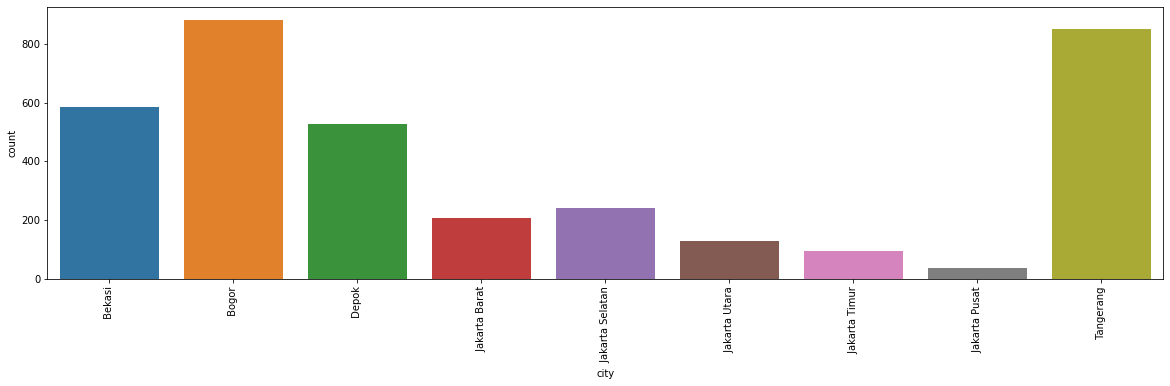

In [141]:
plt.figure(figsize = (20,5))
sns.countplot(df['city'])
plt.xticks(rotation=90)
plt.show()

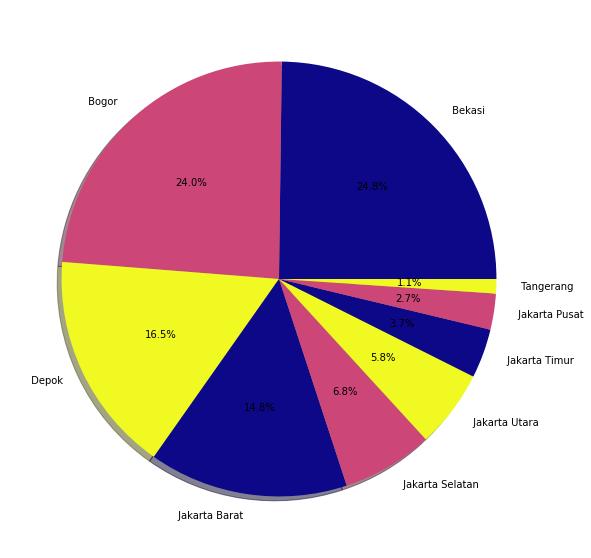

In [142]:
count = df['city'].value_counts()
labels = df['city'].unique()
plt.figure(figsize = (15,10))

plt.pie(count, labels = labels, autopct='%1.1f%%',shadow =True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Balance the dataset

In [143]:
df['city'].value_counts() #menyeimbangkan data, karena IT Business dev dan finance mendominasi karena banyak data (120 dll)

 Bogor              881
 Tangerang          851
 Bekasi             586
 Depok              526
 Jakarta Selatan    240
 Jakarta Barat      206
 Jakarta Utara      130
 Jakarta Timur       95
 Jakarta Pusat       38
Name: city, dtype: int64

In [144]:
from sklearn.utils import resample

#mendapatkan nilai max count dari semua categori = 120
max_count = df['city'].value_counts().max()

#Meresampling setiap kategori ke maximum count yg cocok untuk dataset seimbang
balanced_data = [] # buat empty list
for city in df['city'].unique(): # mengambil nama setiap category
    city_data = df[df['city'] == city] #jika kategori sama masukan ke variable
    if len(city_data) < max_count: 
        # akan melakukan oversampling untuk kategori dengan sampling sedikit atau kurang dari max
        balanced_city_data = resample(city_data, replace=True, n_samples = max_count, random_state=42)
    else:
        # akan melakukan undersampling unutk kategori yg lebih banyak sample
        balanced_city_data = resample(city_data, replace= False, n_samples = max_count, random_state=42)
    balanced_data.append(balanced_city_data)
# Concat untuk hasil balanced data untuk semua kategori
balanced_df = pd.concat(balanced_data)

In [145]:
balanced_df['city'].value_counts()

 Bekasi             881
 Bogor              881
 Depok              881
 Jakarta Barat      881
 Jakarta Selatan    881
 Jakarta Utara      881
 Jakarta Timur      881
 Jakarta Pusat      881
 Tangerang          881
Name: city, dtype: int64

In [146]:
balanced_df.isnull().sum() #cek apakah ada data yg hilang, dan ada 1

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     7
bedrooms                  69
bathrooms                 77
land_size_m2               2
building_size_m2           2
carports                   0
certificate              308
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                    14
building_age            2785
year_built              2785
property_condition       470
building_orientation    3569
garages                    0
furnishing               901
dtype: int64

In [147]:
balanced_df.dropna(inplace=True) # 

In [148]:
balanced_df.isnull().sum() # cek lagi, dan sudah hilang

url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
lat                     0
long                    0
facilities              0
property_type           0
ads_id                  0
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate             0
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
year_built              0
property_condition      0
building_orientation    0
garages                 0
furnishing              0
dtype: int64

# Train Test Split


In [149]:
selected_features = ['district', 'city', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'building_age']
target = 'price_in_rp'

data_subset = df[selected_features + [target]]

In [150]:
# missing value
data_subset['bedrooms'] = data_subset['bedrooms'].fillna(data_subset['bedrooms'].median())
data_subset['bathrooms'] = data_subset['bathrooms'].fillna(data_subset['bathrooms'].median())
data_subset['land_size_m2'] = data_subset['land_size_m2'].fillna(data_subset['land_size_m2'].median())
data_subset['building_size_m2'] = data_subset['building_size_m2'].fillna(data_subset['building_size_m2'].median())
data_subset['building_age'] = data_subset['building_age'].fillna(data_subset['building_age'].median())

C:\Users\Daffa\AppData\Local\Temp\ipykernel_8\1616301147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['bedrooms'] = data_subset['bedrooms'].fillna(data_subset['bedrooms'].median())
C:\Users\Daffa\AppData\Local\Temp\ipykernel_8\1616301147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['bathrooms'] = data_subset['bathrooms'].fillna(data_subset['bathrooms'].median())
C:\Users\Daffa\AppData\Local\Temp\ipykernel_8\1616301147.py:4: SettingWithCopyWarning: 
A value is trying to 

In [151]:
data_subset #test

,district,city,bedrooms,bathrooms,land_size_m2,building_size_m2,building_age,price_in_rp
0,Summarecon Bekasi,Bekasi,4.0,4.0,239.0,272.0,5.0,2.990000e+09
1,Summarecon Bekasi,Bekasi,3.0,2.0,55.0,69.0,1.0,1.270000e+09
2,Summarecon Bekasi,Bekasi,3.0,3.0,119.0,131.0,1.0,1.950000e+09
3,Summarecon Bekasi,Bekasi,3.0,3.0,180.0,174.0,6.0,3.300000e+09
4,Summarecon Bekasi,Bekasi,4.0,3.0,328.0,196.0,9.0,4.500000e+09
...,...,...,...,...,...,...,...,...
3548,Jombang,Tangerang,2.0,1.0,72.0,36.0,0.0,5.880000e+08
3549,Lengkong Kulon,Tangerang,3.0,2.0,85.0,60.0,0.0,7.850000e+08
3550,Lengkong Kulon,Tangerang,3.0,2.0,78.0,60.0,0.0,7.550000e+08
3551,BSD Provance Parkland,Tangerang,3.0,2.0,60.0,65.0,0.0,8.000000e+08


# Encoding (TF-IDF)

In [152]:
data_encoded = pd.get_dummies(data_subset, columns=['district', 'city'], drop_first=True)

In [153]:
data_encoded #test hasil

,bedrooms,bathrooms,land_size_m2,building_size_m2,building_age,price_in_rp,district_Ampera,district_Angke,district_Antasari,district_BSD,...,district_Utan Kayu,district_patra kuningan,city_ Bogor,city_ Depok,city_ Jakarta Barat,city_ Jakarta Pusat,city_ Jakarta Selatan,city_ Jakarta Timur,city_ Jakarta Utara,city_ Tangerang
0,4.0,4.0,239.0,272.0,5.0,2.990000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,55.0,69.0,1.0,1.270000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3.0,119.0,131.0,1.0,1.950000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,180.0,174.0,6.0,3.300000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,3.0,328.0,196.0,9.0,4.500000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,2.0,1.0,72.0,36.0,0.0,5.880000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3549,3.0,2.0,85.0,60.0,0.0,7.850000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3550,3.0,2.0,78.0,60.0,0.0,7.550000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3551,3.0,2.0,60.0,65.0,0.0,8.000000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [154]:
# bagi train dan test
# Pisahkan fitur dan target
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest regression

In [155]:
# Inisialisasi dan latih model RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [156]:
# Evaluasi model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [157]:
mse, r2
# print(classification_report(y_test,y_pred))

(5.521043533042271e+19, 0.2430597818384218)

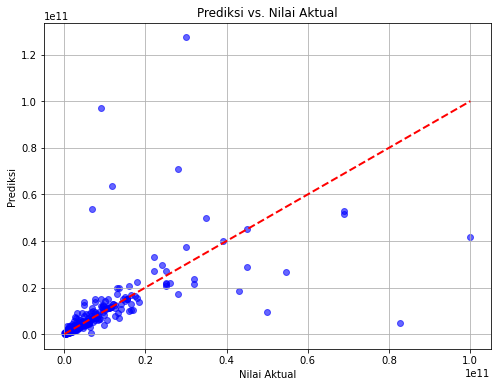

In [158]:
import matplotlib.pyplot as plt

# Scatter plot antara nilai aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Prediksi vs. Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.grid(True)
plt.show()

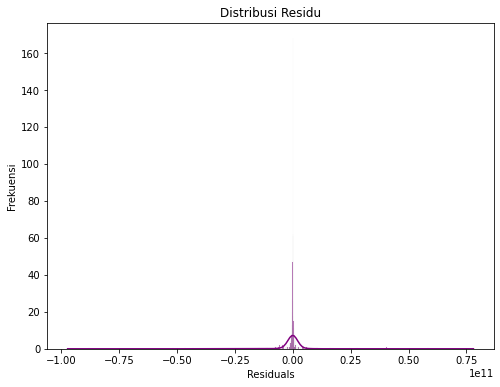

In [159]:
import seaborn as sns

residuals = y_test - y_pred
# Plot histogram residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Residu')
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.show()

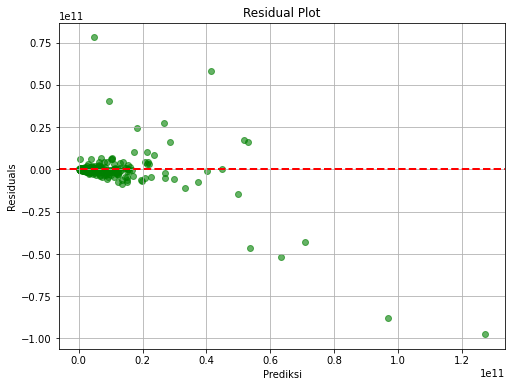

In [160]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Prediksi')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

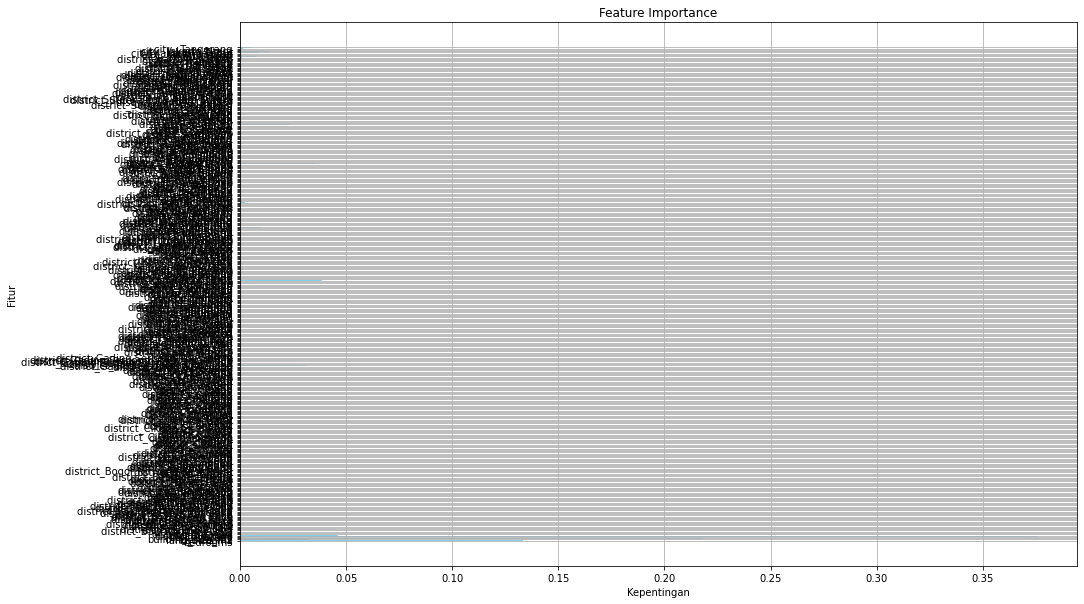

In [161]:
feature_importances = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(15, 10))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Kepentingan')
plt.ylabel('Fitur')
plt.grid(True)
plt.show()

# Predictive System

In [163]:
# Fitur baru yang ingin diprediksi
new_data = pd.DataFrame({
    'district': ['Tanah Abang'],       # Fitur kategori 'district'
    'city': ['jakarta Pusat'],           # Fitur kategori 'city'
    'bedrooms': [4],               # Fitur numerik 'bedrooms'
    'bathrooms': [2],              # Fitur numerik 'bathrooms'
    'land_size_m2': [120],         # Fitur numerik 'land_size_m2'
    'building_size_m2': [150],     # Fitur numerik 'building_size_m2'
    'building_age': [9]           # Fitur numerik 'building_age'
})

# Lakukan One-Hot Encoding pada fitur kategorikal
new_data_encoded = pd.get_dummies(new_data, columns=['district', 'city'], drop_first=True)

# Pastikan bahwa fitur baru memiliki kolom yang sama dengan data pelatihan
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

# Prediksi harga rumah dengan model yang telah dilatih
predicted_price = rf.predict(new_data_encoded)

# Tampilkan hasil prediksi
#predicted_price[0]

#ubah ke format rupiah
predicted_price = rf.predict(new_data_encoded)

# Format harga dalam format Rupiah (misalnya, Rp 1.500.000.000)
formatted_price = f"Rp {predicted_price[0]:,}"

# Tampilkan hasil prediksi dengan format Rupiah
print(f"Prediksi Harga Rumah: {formatted_price}")

Prediksi Harga Rumah: Rp 1,475,650,000.0


# Save Files

In [125]:
import pickle
#save model reg
pickle.dump(rf, open('models/rf_reg_jabodetabek_house_price.csv.pkl','wb'))
#save vectorizer